# Sect 37: Intro to Time Series

- online-ds-ft-070620
- 10/15/20

## Learning Objectives:

- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

- Prepare a time series dataset to use for modeling next class

## Questions?

# Intro to Time Series

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

## Working with Time Series

In [1]:
# !pip install -U fsds 
from fsds.imports import *

import warnings
warnings.filterwarnings('ignore')

## Setting figures to timeseries-friendly
mpl.rcParams['figure.figsize'] = (12,6)

import os,sys

fsds v0.2.26 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
sns.__version__

'0.11.0'

### Creating a Time Series from a DataFrame

In [3]:
df = pd.read_csv('../baltimore_crime_2020.csv',low_memory=False,
                usecols=range(12))
#df = fs.datasets.load_ts_baltimore_crime_full(read_csv_kwds={
#     'low_memory':False,'usecols':list(range(12)) })
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude
0,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,-76.657102,39.336238
1,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,-76.682845,39.319594
2,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,-76.560665,39.293067
3,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,-76.632368,39.292449
4,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,-76.565150,39.277050


## Preparing Data for Time Series Visualization

- Index must be a `datetimeindex`

In [4]:
df.index

RangeIndex(start=0, stop=300336, step=1)

> #### Queston: We need to make a datetime index from the CrimeDate and CrimeTime. How might we do that?

In [5]:
# Make datetime variable from two columns
###
datetime = pd.to_datetime(df['CrimeDate']+' - '+df['CrimeTime'])
datetime

0        2020-04-25 17:30:00
1        2020-04-25 02:40:00
2        2020-04-25 09:30:00
3        2020-04-25 02:30:00
4        2020-04-25 15:30:00
                 ...        
300331   1978-01-01 10:30:00
300332   1977-05-01 00:01:00
300333   1975-06-01 00:00:00
300334   1969-07-20 21:00:00
300335   1963-10-30 00:00:00
Length: 300336, dtype: datetime64[ns]

In [6]:
## Set dataframe index to be time series
###
df.index=datetime
df.index

DatetimeIndex(['2020-04-25 17:30:00', '2020-04-25 02:40:00',
               '2020-04-25 09:30:00', '2020-04-25 02:30:00',
               '2020-04-25 15:30:00', '2020-04-25 05:00:00',
               '2020-04-25 22:13:00', '2020-04-25 16:26:00',
               '2020-04-25 21:07:00', '2020-04-25 23:45:00',
               ...
               '1988-05-01 15:00:00', '1985-01-01 00:00:00',
               '1982-08-01 00:01:00', '1981-12-01 16:45:00',
               '1980-07-01 00:01:00', '1978-01-01 10:30:00',
               '1977-05-01 00:01:00', '1975-06-01 00:00:00',
               '1969-07-20 21:00:00', '1963-10-30 00:00:00'],
              dtype='datetime64[ns]', length=300336, freq=None)

In [7]:
## Preview the dataframe to confirm index
display(df.head(),df.tail())

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude
2020-04-25 17:30:00,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,-76.657102,39.336238
2020-04-25 02:40:00,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,-76.682845,39.319594
2020-04-25 09:30:00,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,-76.560665,39.293067
2020-04-25 02:30:00,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,-76.632368,39.292449
2020-04-25 15:30:00,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,-76.565150,39.277050


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude
1978-01-01 10:30:00,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492
1977-05-01 00:01:00,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.626880,39.328817
1975-06-01 00:00:00,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691297,39.289582
1969-07-20 21:00:00,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635300,39.358898
1963-10-30 00:00:00,10/30/1963,00:00:00,2A,3100 FERNDALE AVE,RAPE,I,OTHER,622.0,NORTHWEST,HOWARD PARK,-76.702636,39.326875


In [8]:
## Save a copy of the original dataframe (IF IT DOESN"T ALREADY EXIST)
### 

if 'df_orig' not in locals():
    print('True')
    df_orig =df.copy()
else:
    print('df_orig already exists')

True


In [9]:
# ## Identify columns to drop/keep
keep_cols = ['Description','Longitude','Latitude','District','Neighborhood']

##  Remake df from df_org using keep_cols
df = df_orig[keep_cols].sort_index().copy()
df

,Description,Longitude,Latitude,District,Neighborhood
1963-10-30 00:00:00,RAPE,-76.702636,39.326875,NORTHWEST,HOWARD PARK
1969-07-20 21:00:00,RAPE,-76.635300,39.358898,NORTHERN,ROLAND PARK
1975-06-01 00:00:00,RAPE,-76.691297,39.289582,SOUTHWEST,UPLANDS
1977-05-01 00:01:00,RAPE,-76.626880,39.328817,NORTHERN,WYMAN PARK
1978-01-01 10:30:00,RAPE,-76.582056,39.340492,NORTHEAST,MORGAN STATE UNIVERS
...,...,...,...,...,...
NaT,SHOOTING,-76.633308,39.296795,WESTERN,NaN
NaT,HOMICIDE,-76.673081,39.320307,NORTHWEST,NaN
NaT,HOMICIDE,-76.660899,39.339841,NORTHERN,NaN
NaT,HOMICIDE,-76.658774,39.331589,NORTHWEST,NaN


In [10]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True).to_frame('% of Total')

# display with an inline-barplot inside your df
crime_counts.style.bar('% of Total')

,% of Total
LARCENY,0.223583
COMMON ASSAULT,0.165148
BURGLARY,0.143539
LARCENY FROM AUTO,0.132375
AGG. ASSAULT,0.108901
AUTO THEFT,0.088088
ROBBERY - STREET,0.070901
ROBBERY - COMMERCIAL,0.017687
SHOOTING,0.013282
ROBBERY - RESIDENCE,0.010388


In [11]:
## Get list of crimes to iterate through
crime_types = df['Description'].unique()
crime_types

array(['RAPE', 'LARCENY', 'BURGLARY', 'LARCENY FROM AUTO', 'AGG. ASSAULT',
       'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY - STREET',
       'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE', 'HOMICIDE',
       'SHOOTING', 'ROBBERY - CARJACKING', 'ARSON'], dtype=object)

In [12]:
## Lets get just Shootings in a new df
group_df = df.groupby('Description').get_group('SHOOTING')
group_df

,Description,Longitude,Latitude,District,Neighborhood
2014-01-01 17:35:00,SHOOTING,-76.672260,39.350624,NORTHWEST,CENTRAL PARK HEIGHTS
2014-01-01 22:31:00,SHOOTING,-76.555139,39.354011,NORTHEAST,GLENHAM-BELFORD
2014-01-03 14:32:00,SHOOTING,-76.645355,39.289607,WESTERN,FRANKLIN SQUARE
2014-01-05 16:30:00,SHOOTING,-76.688085,39.296987,SOUTHWEST,ROGNEL HEIGHTS
2014-01-05 19:41:00,SHOOTING,-76.634616,39.300554,CENTRAL,UPTON
...,...,...,...,...,...
NaT,SHOOTING,-76.597837,39.303182,EASTERN,NaN
NaT,SHOOTING,-76.582107,39.296800,SOUTHEAST,NaN
NaT,SHOOTING,-76.604312,39.312811,EASTERN,NaN
NaT,SHOOTING,-76.540668,39.323562,NORTHEAST,NaN


In [13]:
## Make a new SHOOTING column that is an integer
group_df['SHOOTING'] = (group_df['Description']=='SHOOTING').astype(int)
group_df

,Description,Longitude,Latitude,District,Neighborhood,SHOOTING
2014-01-01 17:35:00,SHOOTING,-76.672260,39.350624,NORTHWEST,CENTRAL PARK HEIGHTS,1
2014-01-01 22:31:00,SHOOTING,-76.555139,39.354011,NORTHEAST,GLENHAM-BELFORD,1
2014-01-03 14:32:00,SHOOTING,-76.645355,39.289607,WESTERN,FRANKLIN SQUARE,1
2014-01-05 16:30:00,SHOOTING,-76.688085,39.296987,SOUTHWEST,ROGNEL HEIGHTS,1
2014-01-05 19:41:00,SHOOTING,-76.634616,39.300554,CENTRAL,UPTON,1
...,...,...,...,...,...,...
NaT,SHOOTING,-76.597837,39.303182,EASTERN,NaN,1
NaT,SHOOTING,-76.582107,39.296800,SOUTHEAST,NaN,1
NaT,SHOOTING,-76.604312,39.312811,EASTERN,NaN,1
NaT,SHOOTING,-76.540668,39.323562,NORTHEAST,NaN,1


In [14]:
## make a dict of all crime types' DataFrames 
CRIMES = {}

## For each crime type
for crime in crime_types:
    
    ## Get the group df
    group_df = df.groupby('Description').get_group(crime).copy()
    
    ## Create a new column for that crime as we did for SHOOTINGS above
    group_df[crime] =(group_df['Description']==crime).astype(int).rename(crime)# group_df[crime.lower()]
    
    ## Save the group_df into the CRIMES dict
    CRIMES[crime] = group_df
    
CRIMES.keys()

dict_keys(['RAPE', 'LARCENY', 'BURGLARY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY - STREET', 'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE', 'HOMICIDE', 'SHOOTING', 'ROBBERY - CARJACKING', 'ARSON'])

# Visualizing Time Series

In [15]:
## Check out SHOOTING key
CRIMES['SHOOTING']

,Description,Longitude,Latitude,District,Neighborhood,SHOOTING
2014-01-01 17:35:00,SHOOTING,-76.672260,39.350624,NORTHWEST,CENTRAL PARK HEIGHTS,1
2014-01-01 22:31:00,SHOOTING,-76.555139,39.354011,NORTHEAST,GLENHAM-BELFORD,1
2014-01-03 14:32:00,SHOOTING,-76.645355,39.289607,WESTERN,FRANKLIN SQUARE,1
2014-01-05 16:30:00,SHOOTING,-76.688085,39.296987,SOUTHWEST,ROGNEL HEIGHTS,1
2014-01-05 19:41:00,SHOOTING,-76.634616,39.300554,CENTRAL,UPTON,1
...,...,...,...,...,...,...
NaT,SHOOTING,-76.597837,39.303182,EASTERN,NaN,1
NaT,SHOOTING,-76.582107,39.296800,SOUTHEAST,NaN,1
NaT,SHOOTING,-76.604312,39.312811,EASTERN,NaN,1
NaT,SHOOTING,-76.540668,39.323562,NORTHEAST,NaN,1


In [16]:
### save the shooting column as ts
ts = CRIMES['SHOOTING']['SHOOTING']
ts

2014-01-01 17:35:00    1
2014-01-01 22:31:00    1
2014-01-03 14:32:00    1
2014-01-05 16:30:00    1
2014-01-05 19:41:00    1
                      ..
NaT                    1
NaT                    1
NaT                    1
NaT                    1
NaT                    1
Name: SHOOTING, Length: 3989, dtype: int64

<AxesSubplot:>

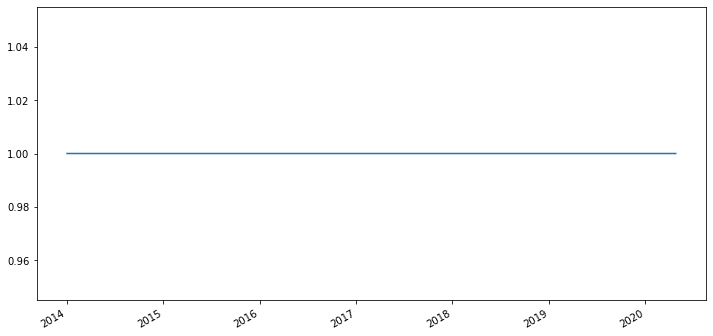

In [17]:
## Plot shooting
ts.plot()

> #### Q: What went wrong? What are we looking at?

## Resampling Time Series

<AxesSubplot:>

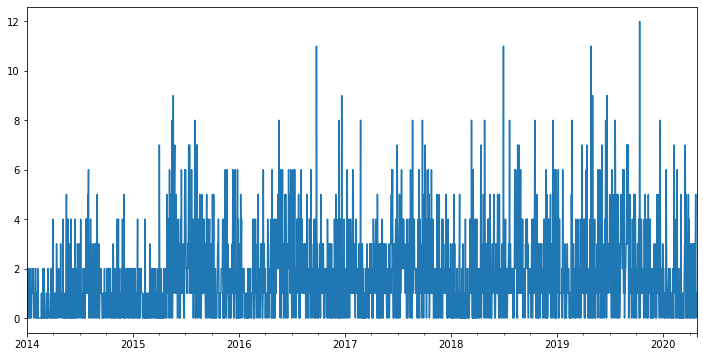

In [18]:
## Resample to daily data
ts = ts.resample('D').sum()
ts.plot()

### Time series Frequencies


#### Pandas Frequency Aliases

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

#### Compare Resampled ts

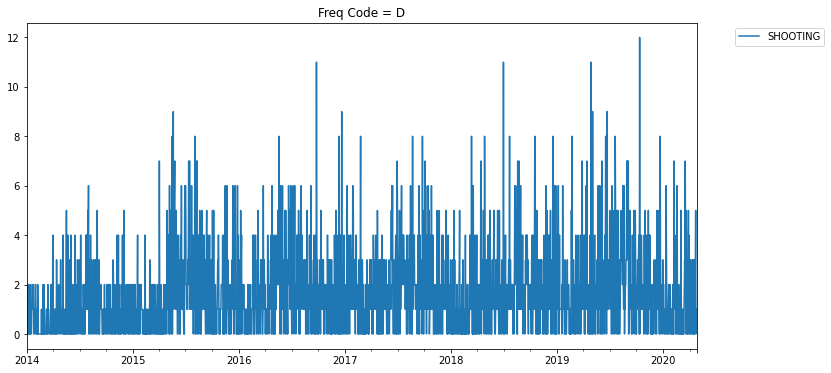

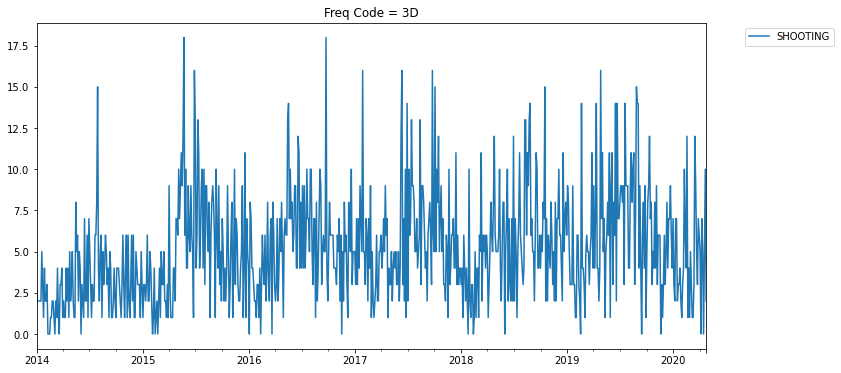

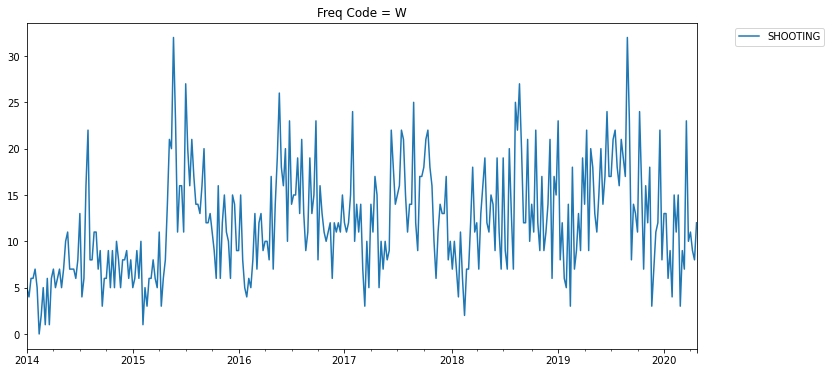

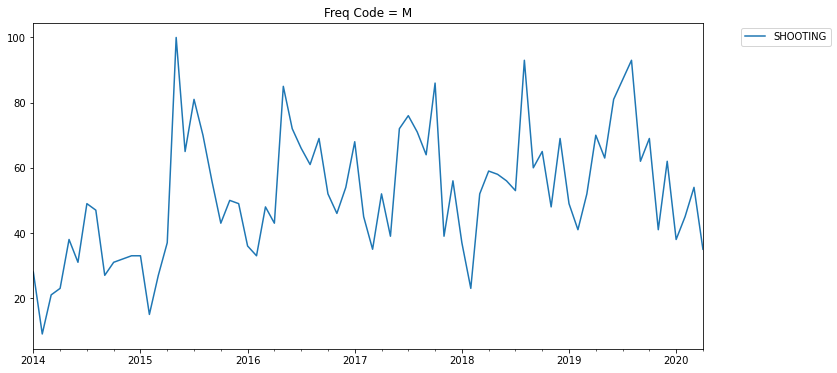

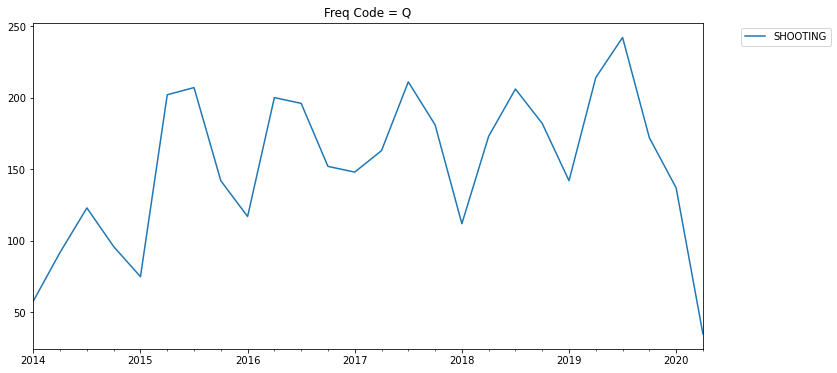

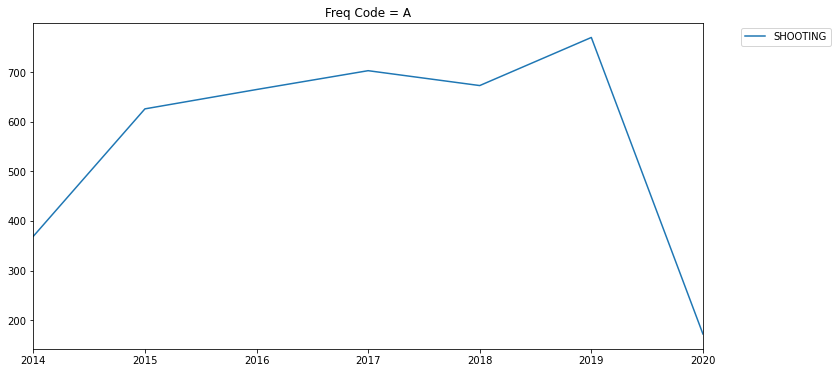

In [19]:
## Plot the same ts as different frequencies
## Specify freq codes
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES['SHOOTING']['SHOOTING']

## For each freq code, resample and plot
for freq in freq_codes:
    
    fig, ax = plt.subplots()
    
    ts.resample(freq).sum().plot(title=f"Freq Code = {freq}",ax=ax)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

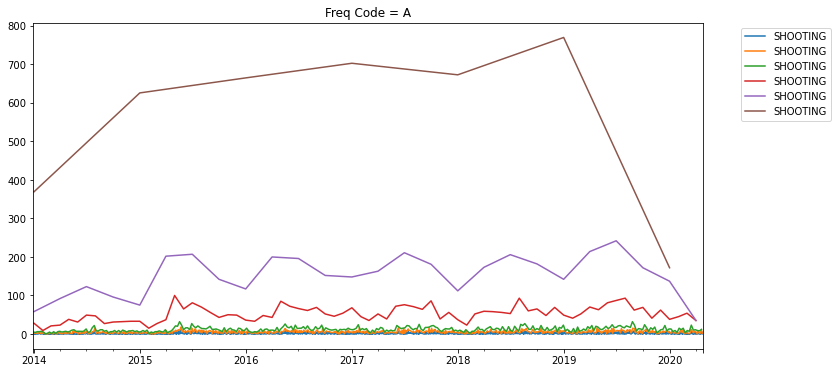

In [20]:
## Repeat the above loop,but plot it all on one figure
freq_codes = ['D','3D','W','M','Q','A']
ts = CRIMES['SHOOTING']['SHOOTING']
fig, ax = plt.subplots()

for freq in freq_codes:
        
    ts.resample(freq).sum().plot(title=f"Freq Code = {freq}",ax=ax)
        
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

## Visualize all CRIMES as "D" Freq

> **Loop through CRIMES and resample and plot all crimes**

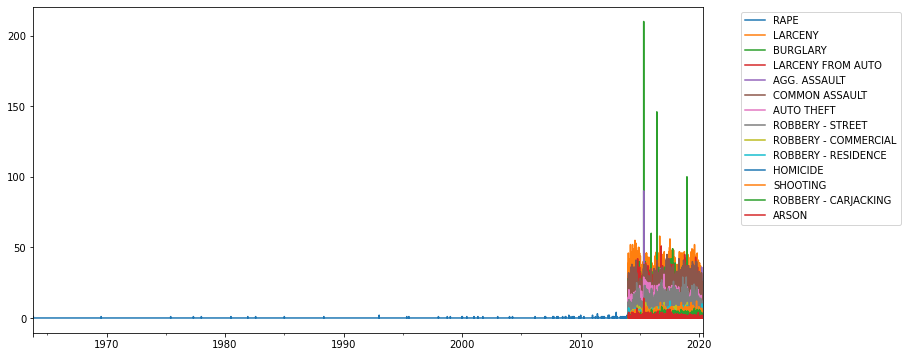

In [21]:
## Plot all crimes the same way
fig, ax = plt.subplots()
for crime,ts in CRIMES.items():
    
    ts[crime].resample('D').sum().plot(label=crime)
    
ax.legend(bbox_to_anchor=[1.05,1.0])

## Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

<AxesSubplot:>

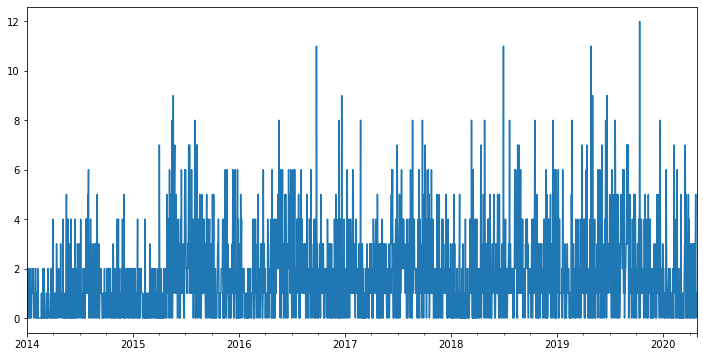

In [22]:
## Sort index
ts = CRIMES['SHOOTING']['SHOOTING'].resample('D').sum()
ts.loc['2014':].plot()

### Using Dictionaries for TIme Series preprocessing

In [23]:
## Save all crimes from 2014 on with freq=D
TS = {}

for crime,ts in CRIMES.items():
    
    TS[crime] = ts.sort_index().loc['2014':,crime].resample('D').sum()
TS.keys()    

dict_keys(['RAPE', 'LARCENY', 'BURGLARY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY - STREET', 'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE', 'HOMICIDE', 'SHOOTING', 'ROBBERY - CARJACKING', 'ARSON'])

In [24]:
TS['SHOOTING']

2014-01-01    2
2014-01-02    0
2014-01-03    1
2014-01-04    0
2014-01-05    2
             ..
2020-04-21    3
2020-04-22    5
2020-04-23    0
2020-04-24    1
2020-04-25    1
Freq: D, Name: SHOOTING, Length: 2307, dtype: int64

### Visualize all ts with the differnet requency codes

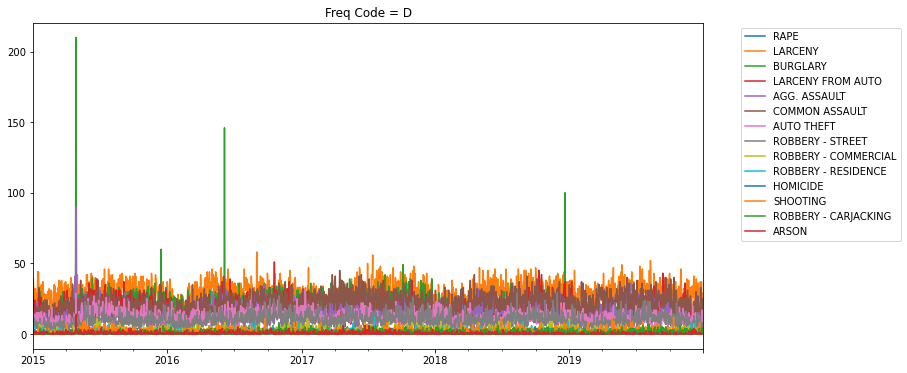

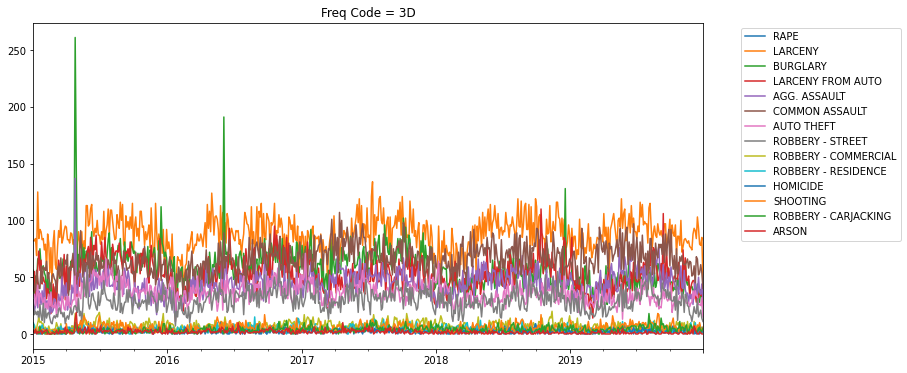

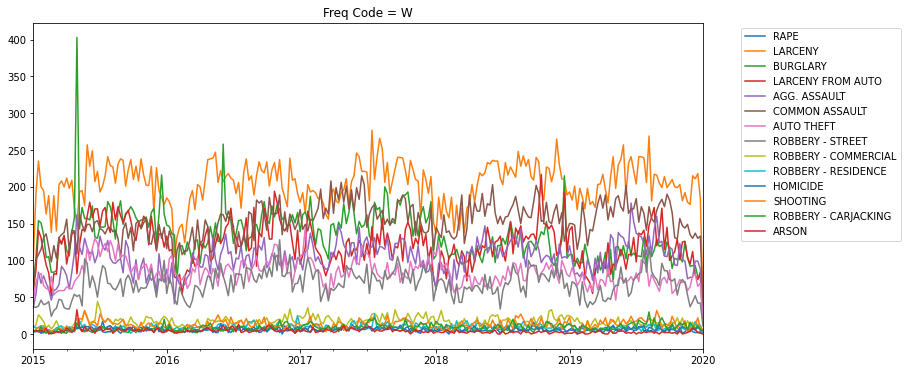

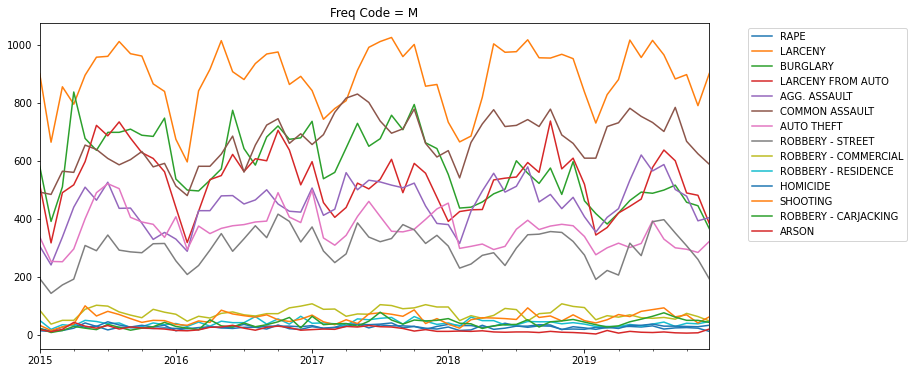

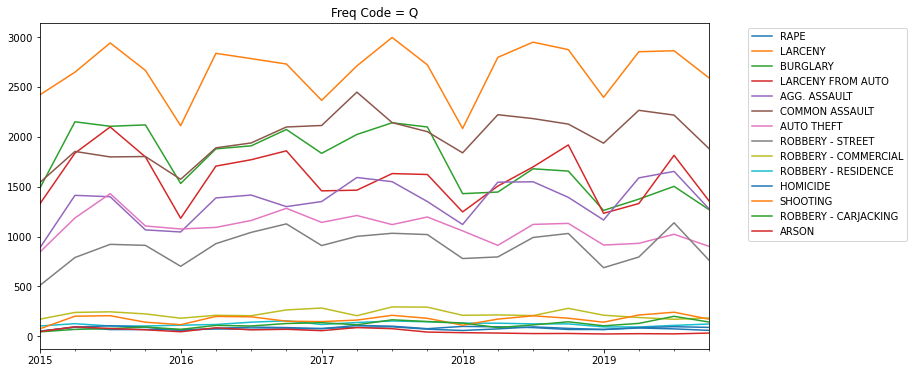

In [25]:
## Plot the same ts as different frequencies
freq_codes = ['D','3D','W','M','Q']

for freq in freq_codes:
    fig, ax = plt.subplots()

    for crime,ts in TS.items():
        ts.loc['2015':'2019'].resample(freq).sum().plot(title=f"Freq Code = {freq}",ax=ax)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

### Save Final TS and `ts_df`

In [26]:
## SAVE FINAL CHOICES FOR YEAR AND FREQUENCY TO TS 
TS = {}

## Fill in each crimes's processed time series 
for crime,ts in CRIMES.items():
    
    ## Slice out years and resample and sum 
    TS[crime] = ts.sort_index().loc['2014':][crime].resample('D').sum()
    
## Make TS into a df
ts_df = pd.concat(TS,axis=1)
ts_df.head()

,RAPE,LARCENY,BURGLARY,LARCENY FROM AUTO,AGG. ASSAULT,COMMON ASSAULT,AUTO THEFT,ROBBERY - STREET,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,HOMICIDE,SHOOTING,ROBBERY - CARJACKING,ARSON
2014-01-01,4.0,34,20,15,22,19,9,8,2,1,2.0,2,NaN,NaN
2014-01-02,0.0,26,28,10,6,23,7,4,1,1,3.0,0,1.0,NaN
2014-01-03,0.0,16,13,6,11,17,3,2,1,1,1.0,1,0.0,NaN
2014-01-04,0.0,23,20,15,14,23,14,7,1,1,0.0,0,0.0,NaN
2014-01-05,1.0,19,14,13,9,22,11,10,0,1,0.0,2,2.0,NaN


In [27]:
## Check For Null Values
ts_df.isna().sum()

RAPE                    6
LARCENY                 0
BURGLARY                0
LARCENY FROM AUTO       0
AGG. ASSAULT            0
COMMON ASSAULT          0
AUTO THEFT              0
ROBBERY - STREET        0
ROBBERY - COMMERCIAL    0
ROBBERY - RESIDENCE     0
HOMICIDE                2
SHOOTING                0
ROBBERY - CARJACKING    4
ARSON                   6
dtype: int64

In [28]:
## Show rows with null values
ts_df[ts_df.isna().sum(axis=1)>0]

,RAPE,LARCENY,BURGLARY,LARCENY FROM AUTO,AGG. ASSAULT,COMMON ASSAULT,AUTO THEFT,ROBBERY - STREET,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,HOMICIDE,SHOOTING,ROBBERY - CARJACKING,ARSON
2014-01-01,4.0,34,20,15,22,19,9,8,2,1,2.0,2,NaN,NaN
2014-01-02,0.0,26,28,10,6,23,7,4,1,1,3.0,0,1.0,NaN
2014-01-03,0.0,16,13,6,11,17,3,2,1,1,1.0,1,0.0,NaN
2014-01-04,0.0,23,20,15,14,23,14,7,1,1,0.0,0,0.0,NaN
2014-01-05,1.0,19,14,13,9,22,11,10,0,1,0.0,2,2.0,NaN
2020-04-20,NaN,13,11,17,14,12,6,5,0,1,0.0,2,0.0,0.0
2020-04-21,NaN,8,12,8,11,6,7,5,1,0,1.0,3,0.0,2.0
2020-04-22,NaN,12,7,5,15,15,6,5,2,0,1.0,5,1.0,0.0
2020-04-23,NaN,13,8,7,6,8,4,6,4,2,1.0,0,NaN,0.0
2020-04-24,NaN,11,13,9,6,13,10,6,0,0,NaN,1,NaN,1.0


> More columns would benefit from ffill than bfill so we are going to ffill and then dropna to remove the few days at the beginning of 2014 without data

In [29]:
## FFill null values
ts_df.ffill(inplace=True)
ts_df.isna().sum()

RAPE                    0
LARCENY                 0
BURGLARY                0
LARCENY FROM AUTO       0
AGG. ASSAULT            0
COMMON ASSAULT          0
AUTO THEFT              0
ROBBERY - STREET        0
ROBBERY - COMMERCIAL    0
ROBBERY - RESIDENCE     0
HOMICIDE                0
SHOOTING                0
ROBBERY - CARJACKING    1
ARSON                   5
dtype: int64

In [30]:
## Drop remaining nulls
ts_df.dropna(inplace=True)
ts_df

,RAPE,LARCENY,BURGLARY,LARCENY FROM AUTO,AGG. ASSAULT,COMMON ASSAULT,AUTO THEFT,ROBBERY - STREET,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,HOMICIDE,SHOOTING,ROBBERY - CARJACKING,ARSON
2014-01-06,1.0,37,26,11,3,23,5,6,0,1,2.0,0,0.0,2.0
2014-01-07,2.0,32,12,11,3,12,11,2,1,0,0.0,0,0.0,0.0
2014-01-08,0.0,23,24,12,9,26,12,6,0,1,1.0,1,1.0,0.0
2014-01-09,0.0,46,25,9,11,20,5,9,1,3,1.0,1,0.0,0.0
2014-01-10,0.0,33,22,24,9,27,9,11,1,0,3.0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,1.0,8,12,8,11,6,7,5,1,0,1.0,3,0.0,2.0
2020-04-22,1.0,12,7,5,15,15,6,5,2,0,1.0,5,1.0,0.0
2020-04-23,1.0,13,8,7,6,8,4,6,4,2,1.0,0,1.0,0.0
2020-04-24,1.0,11,13,9,6,13,10,6,0,0,1.0,1,1.0,1.0


In [31]:
ts_df.isna().sum()

RAPE                    0
LARCENY                 0
BURGLARY                0
LARCENY FROM AUTO       0
AGG. ASSAULT            0
COMMON ASSAULT          0
AUTO THEFT              0
ROBBERY - STREET        0
ROBBERY - COMMERCIAL    0
ROBBERY - RESIDENCE     0
HOMICIDE                0
SHOOTING                0
ROBBERY - CARJACKING    0
ARSON                   0
dtype: int64

In [32]:
null_cols = ts_df.columns[ts_df.isna().sum()>0]
null_cols

Index([], dtype='object')

In [33]:
## Save df to csv for time series modeling next class
ts_df.to_csv('baltimore_crime_2020_ts_070620ft.csv')

# Time Series Trends

### Types of Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=80%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

In [34]:
## Lab Function
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    display (dfoutput.round(3))
    
    return dfoutput
#     return dftest

In [35]:
ts = TS['SHOOTING']
ts
# ts = ts.resample('D').sum().asfreq('D')

2014-01-01    2
2014-01-02    0
2014-01-03    1
2014-01-04    0
2014-01-05    2
             ..
2020-04-21    3
2020-04-22    5
2020-04-23    0
2020-04-24    1
2020-04-25    1
Freq: D, Name: SHOOTING, Length: 2307, dtype: int64

<AxesSubplot:>

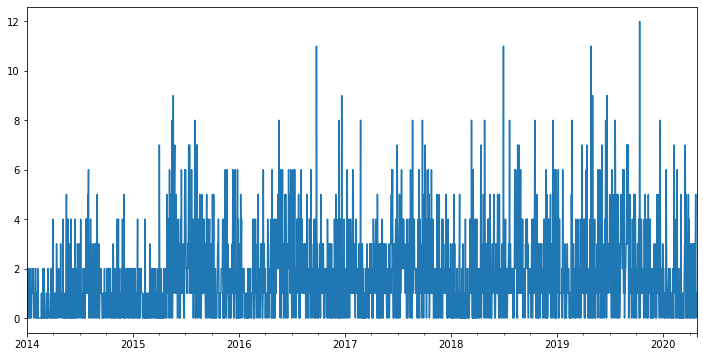

In [36]:
ts.plot()

Results of Dickey-Fuller Test:


Test Statistic                   -5.815
p-value                           0.000
#Lags Used                       20.000
Number of Observations Used    2286.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
sig                               1.000
dtype: float64

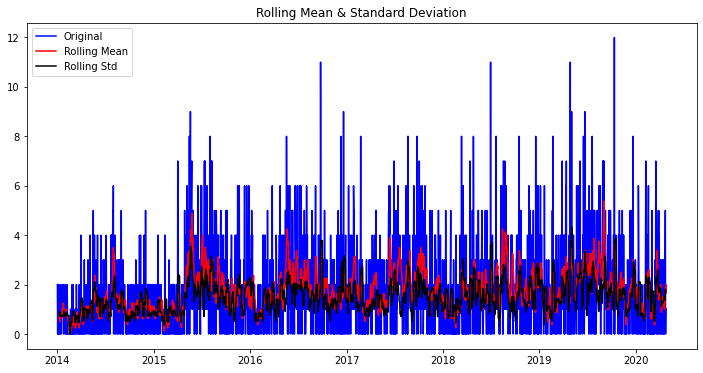

In [37]:
res = stationarity_check(ts);

# Removing Trends (cont'd next class)

- .diff()
- subtract rolling mean
- seasonal decomposition

## Seasonal Decomposition

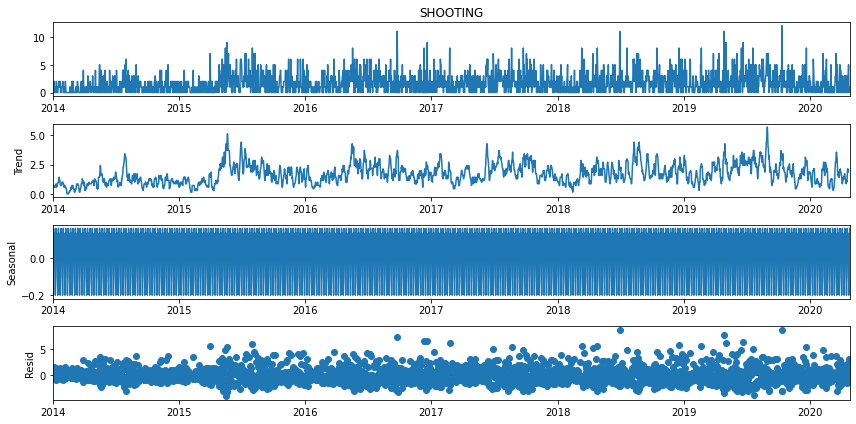

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts)#.plot();
decomp.plot();

In [39]:
decomp.resid

2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-04   -0.873463
2014-01-05    1.431791
                ...   
2020-04-21    1.033615
2020-04-22    3.097879
2020-04-23         NaN
2020-04-24         NaN
2020-04-25         NaN
Freq: D, Name: resid, Length: 2307, dtype: float64

In [40]:
decomp.seasonal

2014-01-01   -0.097879
2014-01-02   -0.201833
2014-01-03   -0.099045
2014-01-04    0.159177
2014-01-05   -0.003220
                ...   
2020-04-21    0.109242
2020-04-22   -0.097879
2020-04-23   -0.201833
2020-04-24   -0.099045
2020-04-25    0.159177
Freq: D, Name: seasonal, Length: 2307, dtype: float64

## Rolling Windows

In [41]:
ts_df.rolling(1).mean()

,RAPE,LARCENY,BURGLARY,LARCENY FROM AUTO,AGG. ASSAULT,COMMON ASSAULT,AUTO THEFT,ROBBERY - STREET,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,HOMICIDE,SHOOTING,ROBBERY - CARJACKING,ARSON
2014-01-06,1.0,37.0,26.0,11.0,3.0,23.0,5.0,6.0,0.0,1.0,2.0,0.0,0.0,2.0
2014-01-07,2.0,32.0,12.0,11.0,3.0,12.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2014-01-08,0.0,23.0,24.0,12.0,9.0,26.0,12.0,6.0,0.0,1.0,1.0,1.0,1.0,0.0
2014-01-09,0.0,46.0,25.0,9.0,11.0,20.0,5.0,9.0,1.0,3.0,1.0,1.0,0.0,0.0
2014-01-10,0.0,33.0,22.0,24.0,9.0,27.0,9.0,11.0,1.0,0.0,3.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,1.0,8.0,12.0,8.0,11.0,6.0,7.0,5.0,1.0,0.0,1.0,3.0,0.0,2.0
2020-04-22,1.0,12.0,7.0,5.0,15.0,15.0,6.0,5.0,2.0,0.0,1.0,5.0,1.0,0.0
2020-04-23,1.0,13.0,8.0,7.0,6.0,8.0,4.0,6.0,4.0,2.0,1.0,0.0,1.0,0.0
2020-04-24,1.0,11.0,13.0,9.0,6.0,13.0,10.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
ts_df.rolling(7).mean().plot()

# APPENDIX

In [ ]:
ax = ts_df.loc['2017':,'BURGLARY'].plot()
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')
ax.set(ylabel='# of Crimes',xlabel='Year by Day')

## Time Series Calculations


### Rolling Statistics

In [ ]:
## Plot the same ts as different frequencies
# freq_codes = ['D','3D','W','M','Q']
windows = [3,5,7,30,90]
for window in windows:
    
    fig,ax = plt.subplots()
    ts_df.rolling(window).mean().plot(title= f"Window = {window}",ax=ax)
#     ts.rolling(window).mean().plot(title=title)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

In [ ]:
ts = TS['HOMICIDE']
ts

In [ ]:
ts = ts.resample('W').sum()
ts

In [ ]:
ts_mean = ts.rolling(window=2).sum()
ax = ts.plot(label='Time Series')
ts_mean.plot(label='Rolling 7-Day Average')
ax.legend()

In [ ]:
## fill in null values
# ts.plot()
ts.ewm(halflife=2).mean()#sum()#.plot()

In [ ]:
## Use adfull to test for stationarity
ts.plot()

## Using Datetime objects and apply statemements

In [ ]:
df_ = CRIMES['HOMICIDE'].reset_index().dropna()
display(df_.head())
df_.dtypes

In [ ]:
df_['index'][0]

In [ ]:
df_['index'].dt.year#.strftime('%y')

In [ ]:
df_.isna().sum()

In [ ]:
df_['index'].dt.year

In [ ]:
df_['index'].map(lambda x: x.strftime('%Y'))

In [ ]:
test = df_.loc[0,'index']
test

In [ ]:
test.strftime('%y')

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [ ]:
test = ts.index[0]
print(test)
test


In [ ]:
print(test.strftime("%m-%d-%Y"))
print(test.strftime("%T"))

In [ ]:
TS['SHOOTING']

## A: Groupby Indexing

In [ ]:
ts.groupby(pd.Grouper(freq='M')).sum().plot(subplots=True)